**CIFAR-10**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential,load_model,save_model

In [3]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [8]:
history = model.fit(x_train,y_train,batch_size=64,epochs=50,validation_split=0.2,validation_data=(x_test,y_test))

Epoch 1/50
782/782 [==============================] - 16s 6ms/step - loss: 1.6125 - accuracy: 0.4088 - val_loss: 1.3481 - val_accuracy: 0.5109
Epoch 2/50
782/782 [==============================] - 4s 6ms/step - loss: 1.2629 - accuracy: 0.5490 - val_loss: 1.1678 - val_accuracy: 0.5844
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.1136 - accuracy: 0.6077 - val_loss: 1.0764 - val_accuracy: 0.6252
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 1.0100 - accuracy: 0.6451 - val_loss: 1.0523 - val_accuracy: 0.6318
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 0.9319 - accuracy: 0.6751 - val_loss: 0.9962 - val_accuracy: 0.6502
Epoch 6/50
782/782 [==============================] - 4s 6ms/step - loss: 0.8713 - accuracy: 0.6961 - val_loss: 0.9230 - val_accuracy: 0.6773
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.8182 - accuracy: 0.7151 - val_loss: 0.9046 - val_accuracy: 0.6934
Epoch

In [10]:
loss,acc = model.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

313/313 [==============================] - 1s 3ms/step - loss: 1.9326 - accuracy: 0.6953
Loss: 1.9326318502426147
Accuracy: 0.6952999830245972


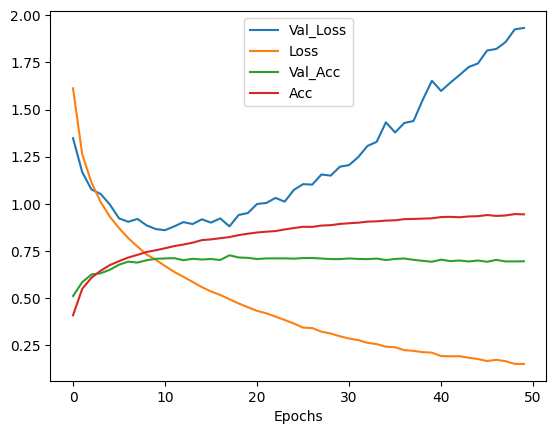

In [15]:
plt.plot(history.history['val_loss'],label="Val_Loss")
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_accuracy'],label="Val_Acc")
plt.plot(history.history['accuracy'],label="Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()